# Load packages and data

In [1]:
# Loading the required packages to run this notebook
import src.utils.utils as utils
from src.visualisation.VisualiseTrajectories import VisualiseTrajectories
from pathlib import Path

# Define the region to look into
region = "Bornholm"
zoom = 8

In [2]:
# Use the VisualiseTrajectories class
fig_size = (10, 10)
visualise_trajectories = VisualiseTrajectories(region, save_figures=True, plot_figures=True, fig_size=fig_size, zoom=zoom)

# Load the static Google Map image for the RIO
img = visualise_trajectories.read_static_map()

In [3]:
file_name = "RegionBornholm_01062019_30092019_CargTank_14400_86400_0"
processed_data_dir =  visualise_trajectories.processed_data_dir
data_file = processed_data_dir / ("data_" + file_name + ".pkl")
data_info_file = processed_data_dir / ("datasetInfo_" + file_name + ".pkl")
data_info = utils.read_data_info_file(data_info_file)# Read the info file to know how to read the data file
data_info["indicies"][:10]

[0, 224718, 403103, 562598, 741480, 828720, 953458, 977117, 1120994, 1268679]

# Visualise single trajectories geographically 

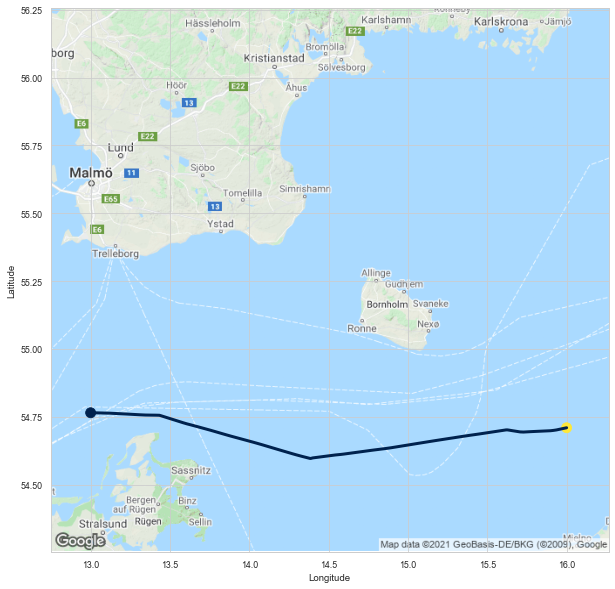

In [4]:
# Plot a single complete vessel trajectory on the static map
df_lon_lat = utils.get_track_by_index(data_file, idx=0, keep_cols=["Longitude", "Latitude"])
visualise_trajectories.read_map_plot_single_track(df_lon_lat)

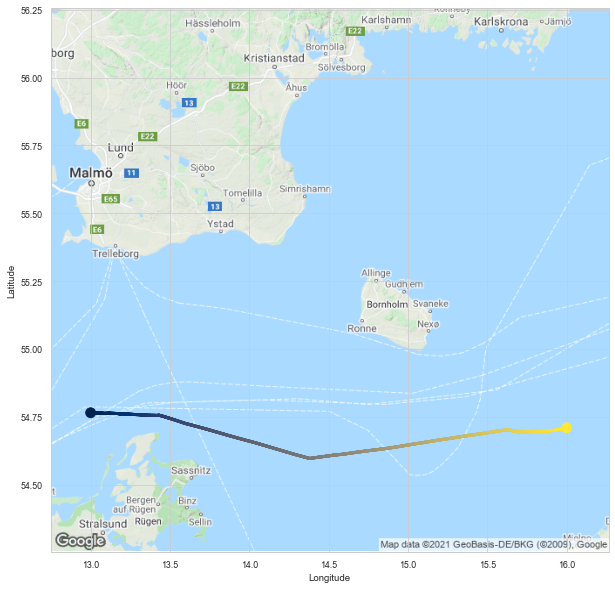

In [5]:
# Plot a single complete vessel trajectory on the static map
visualise_trajectories.read_map_plot_single_track(df_lon_lat, use_cmap=True)

# Visualise multiple trajectories geographically 

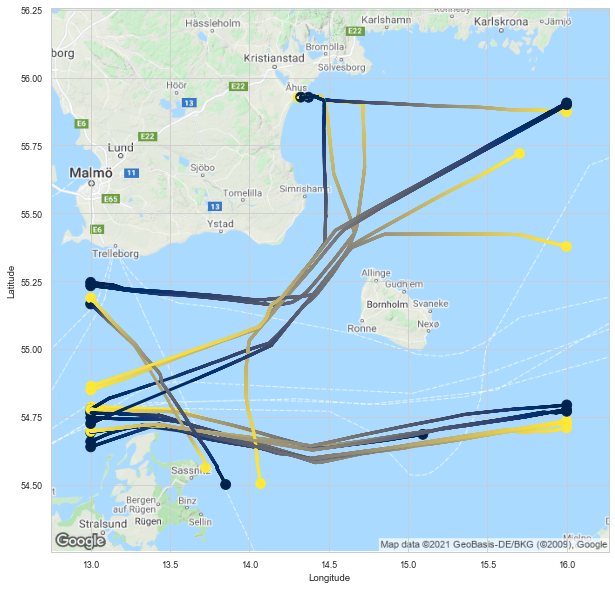

In [6]:
# Plot some trajectory examples
fig, ax = visualise_trajectories.visualise_static_map(img)
tracks = visualise_trajectories.plot_multiple_tracks(ax, indicies=data_info["indicies"][:20],
                                                     data_path=data_file, use_cmap=True)

# Visualise multiple trajectories geographically - Comparison

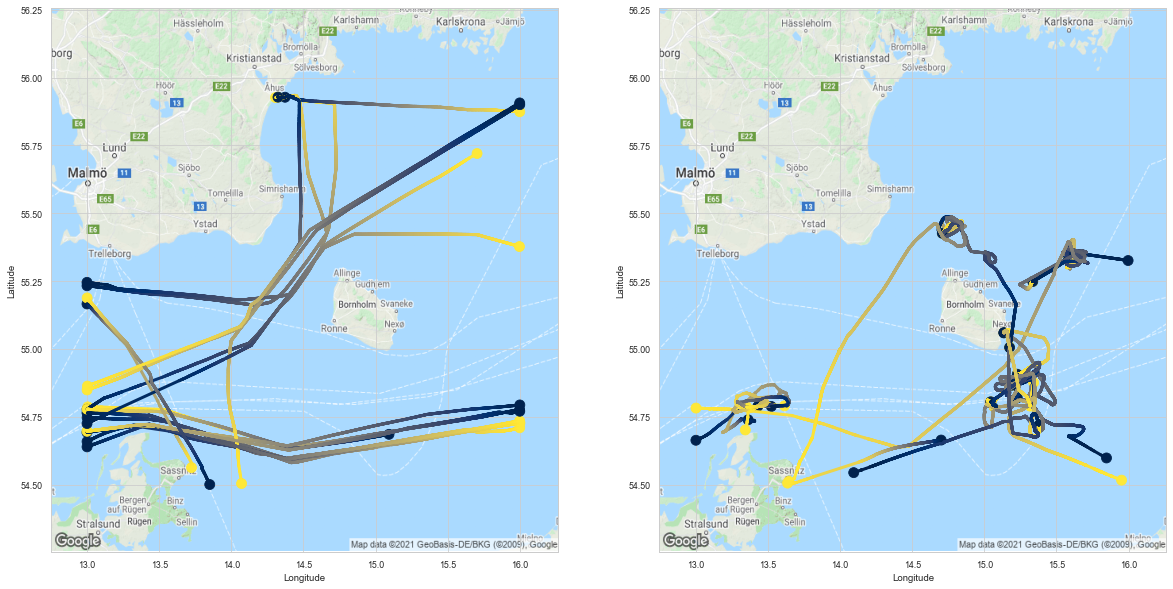

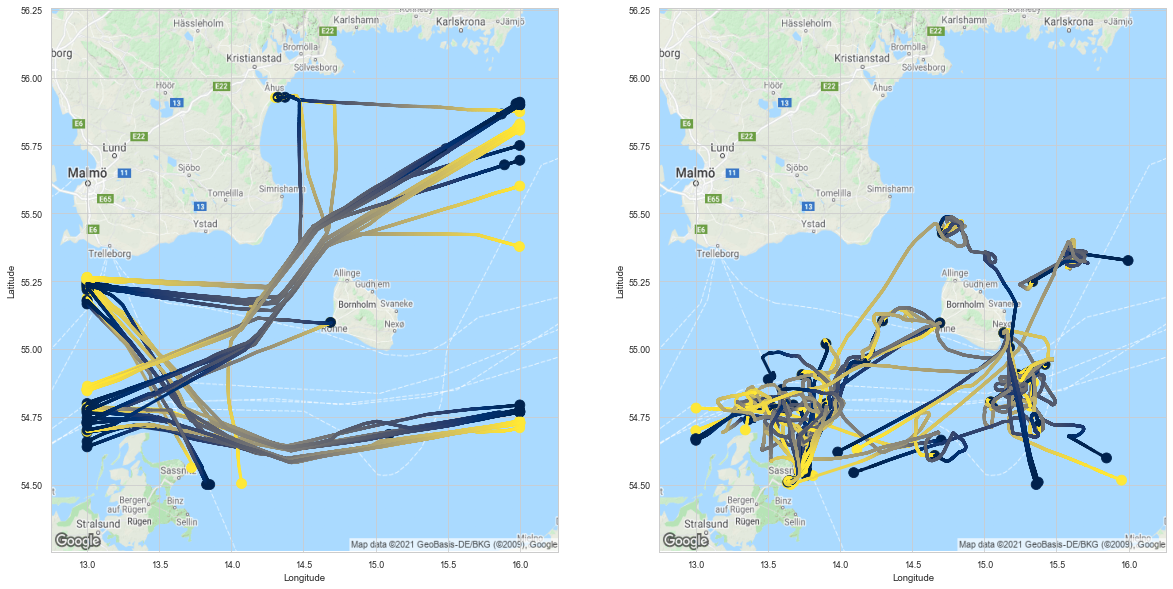

In [7]:
# Plot Cargo and tankers on one side and fishing vessel trajectory examples on the other
visualise_trajectories.fig_size = (20,10)
fig, ax = visualise_trajectories.visualise_static_map(img, subplots=[1, 2])
fig2, ax2 = visualise_trajectories.visualise_static_map(img, subplots=[1, 2])

# Plot some cargo and tanker vessel trajectory examples
file_name = "RegionBornholm_01062019_30092019_CargTank_14400_86400_0"
data_file = processed_data_dir / ("data_" + file_name + ".pkl")
data_info_file = processed_data_dir / ("datasetInfo_" + file_name + ".pkl")
data_info_carg_tank = utils.read_data_info_file(data_info_file) # Read the info file to know how to read the data file
tracks_carg_tank = visualise_trajectories.plot_multiple_tracks(ax[0], indicies=data_info_carg_tank["indicies"][:20],
                                                               data_path=data_file, use_cmap=True)
tracks_carg_tank = visualise_trajectories.plot_multiple_tracks(ax2[0], indicies=data_info_carg_tank["indicies"][:50],
                                                               data_path=data_file, use_cmap=True)


file_name = "RegionBornholm_01062019_30092019_Fish_14400_86400_0"
data_file = processed_data_dir / ("data_" + file_name + ".pkl")
data_info_file = processed_data_dir / ("datasetInfo_" + file_name + ".pkl")
data_info_fish = utils.read_data_info_file(data_info_file) # Read the info file to know how to read the data file
tracks_fish = visualise_trajectories.plot_multiple_tracks(ax[1], indicies=data_info_fish["indicies"][:20],
                                                          data_path=data_file, use_cmap=True)
tracks_fish = visualise_trajectories.plot_multiple_tracks(ax2[1], indicies=data_info_fish["indicies"][:50],
                                                          data_path=data_file, use_cmap=True)